In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px

%matplotlib inline

## Data Analysis of [ Brazilian Amazon Rainforest Degradation 1999-2019](https://www.kaggle.com/datasets/mbogernetto/brazilian-amazon-rainforest-degradation)

In [65]:
def_amazon_data = pd.read_csv(r"C:\Users\Lakshmi\Downloads\archive (1)\def_area_2004_2019.csv", parse_dates=True, encoding = "cp1252")
def_amazon_data.head(20)

,ï»¿Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911
5,2009,167,405,70,828,1049,4281,482,121,61,7464
6,2010,259,595,53,712,871,3770,435,256,49,7000
7,2011,280,502,66,396,1120,3008,865,141,40,6418
8,2012,305,523,27,269,757,1741,773,124,52,4571
9,2013,221,583,23,403,1139,2346,932,170,74,5891


### Deforestation Area

In [20]:
def_amazon_data.rename({
    'ï»¿Ano/Estados':'Year',
    'AC':'Acre',
    'AM': 'Amazonas',
    'AP': 'Amapa',
    'MA':'Maranhao',
    'MT':'Mato Grosso',
    'PA':'Para',
    'RO':'Rondonia',
    'RR':'Roraima',
    'TO':'Tocantins',
    'AMZ LEGAL':'Total'
}, axis=1, inplace=True)

def_amazon_data.head()

,Year,Acre,Amazonas,Amapa,Maranhao,Mato Grosso,Para,Rondonia,Roraima,Tocantins,Total
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911


### Total Deforested Area per Year

In [21]:
fig = px.bar(def_amazon_data, x="Year", y="Total")
fig.update_layout(title_text='Total Deforested Area per Year')
fig.update_xaxes(tickmode='linear')
fig.show()

### Total Deforested Area by State

In [22]:
states=["Acre","Amazonas","Amapa","Maranhao","Mato Grosso","Para","Rondonia","Roraima","Tocantins"]
data=[]

for i in range(len(states)):
    data.append(def_amazon_data[states[i]].sum())
    
colors = ['lightslategray',] * 9
colors[5] = 'crimson'

fig = go.Figure(data=[go.Bar(x=states, y=data, text=data, textposition='auto', marker_color=colors)])
fig.update_layout(title_text='Total Deforested Area by State')

fig.show()

### Predict the total deforested area in a particular year

In [23]:
from sklearn.model_selection import train_test_split

X = def_amazon_data["Year"]
y = def_amazon_data["Total"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
X_train = X_train.values.reshape(-1,1)
regressor.fit(X_train, y_train)

LinearRegression()

In [25]:
X_test = X_test.values.reshape(-1,1)
y_pred = regressor.predict(X_test)

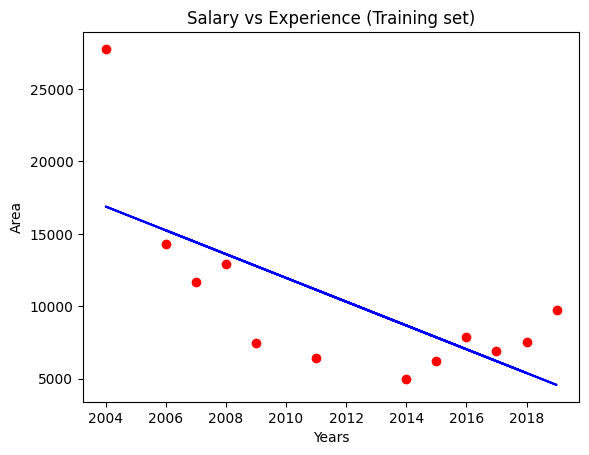

In [26]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years')
plt.ylabel('Area')
plt.show()

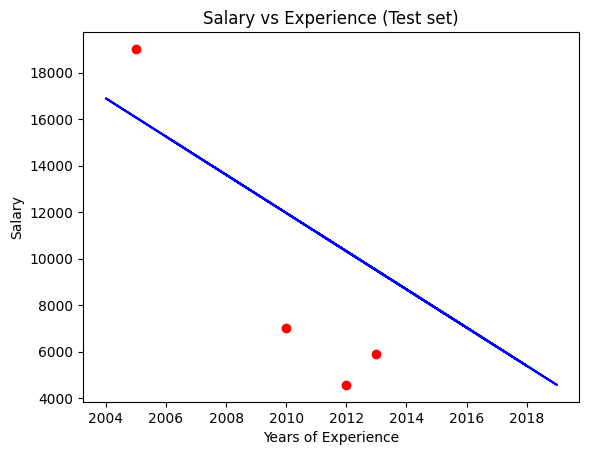

In [27]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)

In [29]:
X.values.reshape(-1,1)

array([[2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019]], dtype=int64)

In [30]:
X.shape

(16,)

In [31]:
X = np.array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])
X = X.reshape(-1, 1)

X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

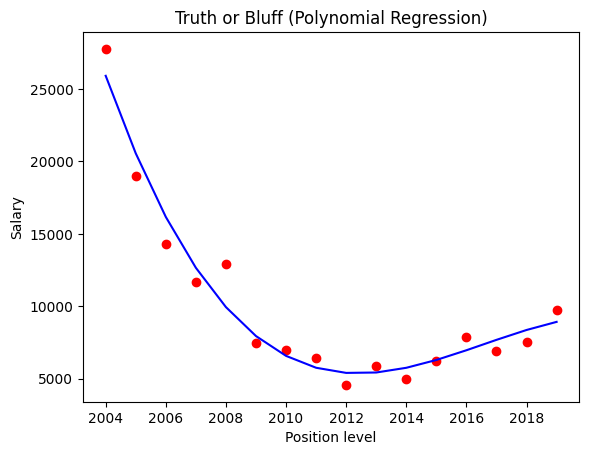

In [32]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

C:\Users\Lakshmi\AppData\Local\Temp\ipykernel_26556\3061864919.py:1: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



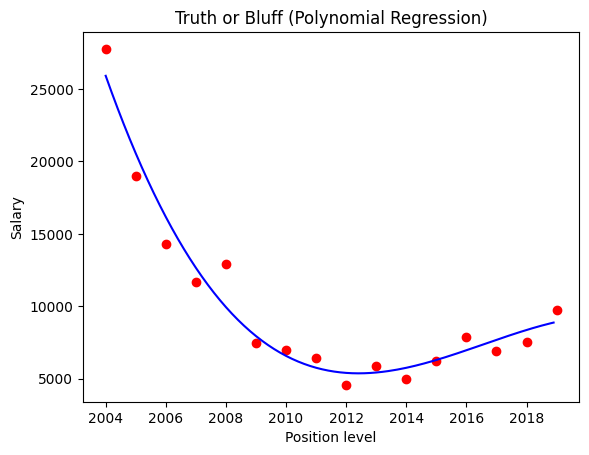

In [33]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [34]:
lin_reg_2.predict(poly_reg.fit_transform([[2009]]))

array([7943.64276886])

## Evacuation model building

### Predict the deforested area in a particular place in a particular year

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [42]:
data = pd.read_csv(r"C:\Users\Lakshmi\Downloads\archive (1)\def_area_2004_2019.csv", parse_dates=True, encoding = "cp1252")

In [43]:
data.rename({
    'ï»¿Ano/Estados':'Year',
    'AC':'Acre',
    'AM': 'Amazonas',
    'AP': 'Amapa',
    'MA':'Maranhao',
    'MT':'Mato Grosso',
    'PA':'Para',
    'RO':'Rondonia',
    'RR':'Roraima',
    'TO':'Tocantins',
    'AMZ LEGAL':'Total'
}, axis=1, inplace=True)

data.head()

,Year,Acre,Amazonas,Amapa,Maranhao,Mato Grosso,Para,Rondonia,Roraima,Tocantins,Total
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911


In [48]:
x1 = data['Year']
y1 = data.drop(columns=['Year','Total'])

In [49]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [52]:
# Initialize a multi-output regression model using RandomForestRegressor as the base estimator
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
X_train1 = X_train.reshape(-1,1)
model.fit(X_train1, y_train1)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [63]:
# Make predictions on the test set
X_test1 = X_train.reshape(-1,1)
y_pred1 = model.predict(X_test1)

# Calculate mean squared error for each place
# mse_per_place = mean_squared_error(y_test1, y_pred1, multioutput='raw_values')

# Predict deforestation for a specific year and get the predictions for different places
new_year = 2010
new_data = pd.DataFrame({'year': [new_year]})
predicted_deforestation = model.predict(new_data)

# print("Mean Squared Error for each place:", mse_per_place)
print("Predicted deforestation for year", new_year, "in different places:", predicted_deforestation)

Predicted deforestation for year 2010 in different places: [[ 309.48  796.26   30.18  473.88 2266.18 4609.6  1423.68  354.8    52.52]]


C:\Users\Lakshmi\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

C:\Users\Lakshmi\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

C:\Users\Lakshmi\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

C:\Users\Lakshmi\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

C:\Users\Lakshmi\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

C:\Users\Lakshmi\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

C:\Users\Lakshmi\anaconda3\lib\sit

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize a dictionary to store the regressors
regressors = {}

# Train a separate RandomForestRegressor for each place
for place in y_train1.columns:
    regressor = RandomForestRegressor(n_estimators=100, random_state=42)
    regressor.fit(X_train1, y_train1[place])
    regressors[place] = regressor

# Make predictions on the test set for each place
y_pred1 = pd.DataFrame({place: regressors[place].predict(X_test1) for place in y_train1.columns})

# Calculate mean squared error for each place
# mse_per_place = mean_squared_error(y_test1, y_pred1, multioutput='raw_values')

# Predict deforestation for a specific year and get the predictions for different places
new_year = 2010
new_data = pd.DataFrame({'year': [new_year]})
# predicted_deforestation = {place: regressors[place].predict(new_data)[0] for place in y_train.columns}
predicted_deforestation1 = {place: regressors[place].predict(new_data)[0] for place in y.columns}


# print("Mean Squared Error for each place:", mse_per_place)
print("Predicted deforestation for year", new_year, "in different places:", predicted_deforestation)


Predicted deforestation for year 2010 in different places: {'Acre': 309.48, 'Amazonas': 796.26, 'Amapa': 30.18, 'Maranhao': 473.88, 'Mato Grosso': 2266.18, 'Para': 4609.6, 'Rondonia': 1423.68, 'Roraima': 354.8, 'Tocantins': 52.52}


C:\Users\Lakshmi\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

C:\Users\Lakshmi\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

C:\Users\Lakshmi\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

C:\Users\Lakshmi\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

C:\Users\Lakshmi\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

C:\Users\Lakshmi\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

C:\Users\Lakshmi\anaconda3\lib\sit

In [64]:
predicted_deforestation

array([[ 309.48,  796.26,   30.18,  473.88, 2266.18, 4609.6 , 1423.68,
         354.8 ,   52.52]])